In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#%matplotlib notebook

from sklearn import datasets
from io import StringIO

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

#np.set_printoptions(precision=2)

import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
#from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
#from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC

In [2]:
dados = pd.read_csv('winequality.csv', sep = ';')

In [4]:
dados.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  White            7.0              0.27         0.36            20.7   
1  White            6.3              0.30         0.34             1.6   
2  White            8.1              0.28         0.40             6.9   
3  White            7.2              0.23         0.32             8.5   
4  White            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates alcohol  quality  
0       0.45     8.8        6  
1       0.49     9.5        6  
2       0.44    10.1        6  
3       0.40     9.9        6  
4       0.40     9.9        6

In [5]:
dados.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
dados.shape

(6497, 13)

In [7]:
# O database original tem 13 colunas (12 features e 1 variável-resposta)
# com 6497 observações.

In [8]:
dados.count()

type                    6497
fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64

In [9]:
# Não há nan ou null values no dataset fornecido

In [10]:
# Vamos obter info sobre a tipagem das variáveis:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


In [11]:
# Como vemos acima, no dataset , além da variável resposta Qualidade, 
# temos somente mais uma 
#variável categórica no dataset, que é tipo (type)

In [12]:
# analisando os valores distintos das features e da var. resposta
# no dataset:
for col in dados.columns:
    print('Distinct values for feature', col)
    print(pd.unique(dados[[col]].values.ravel('K')))
    print('\n')
    print('\n')

Distinct values for feature type
['White' 'Red']




Distinct values for feature fixed acidity
[ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3   7.4   6.5   6.4
  6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5   9.8
  5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3   5.4
  9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3   9.4
  9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15  4.5
  7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9  11.2  10.1  11.5  12.8
 11.   11.6  12.   15.   10.8  11.1  12.5  10.9  11.4  10.4  13.3  10.6
 13.4  11.9  12.4  12.2  13.8  13.5  10.5  12.6  14.   13.7  12.7  12.3
 15.6  11.3  13.   12.9  14.3  15.5  11.7  13.2  15.9  12.1 ]




Distinct values for feature volatile acidity
[0.27 0.3  0.28 0.23 0.32 0.22 0.18 0.16 0.42 0.17 0.48 0.66 0.34 0.31
 0.26 0.67 0.25 0.24 0.14 0.12 0.39 0.33 0.45 0.46 0.19 0.2  0.21 0.38
 0.47 0.35 0.54 0.43 0.44 0.27 0.36 0.3  0.13 0.41 0.48 0.42 0.37 0.26
 0.59

In [13]:
# COntando os distinct values de cada var

for coluna in dados.columns:
    print('Distinct values of variable: ', coluna)
    print(dados[coluna].value_counts())
    print('\n')
    print('\n')

Distinct values of variable:  type
White    4898
Red      1599
Name: type, dtype: int64




Distinct values of variable:  fixed acidity
6.80     354
6.60     327
6.40     305
7.00     282
6.90     279
7.20     273
6.70     264
7.10     257
6.50     242
7.40     238
7.30     222
6.20     212
6.30     202
7.60     199
6.00     197
7.50     175
6.10     171
7.80     146
7.70     142
5.80     125
8.00     122
7.90     116
5.90     112
8.20     101
8.30      92
5.70      90
5.60      85
8.10      82
8.40      61
8.60      52
        ... 
12.60      4
12.20      4
12.40      4
13.00      3
11.70      3
11.00      3
13.30      3
4.40       3
13.20      3
6.15       2
15.50      2
12.90      2
4.20       2
15.60      2
7.15       2
13.70      2
15.00      2
4.60       2
13.40      1
13.50      1
3.80       1
4.50       1
12.10      1
14.00      1
3.90       1
14.30      1
15.90      1
13.80      1
14.20      1
6.45       1
Name: fixed acidity, Length: 106, dtype: int64




Distinct values of v

In [14]:
# Como já mencionado anteriormente não há informações faltantes no banco de dados
dados.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Análise e elimina~çao de outliers para as variáveis contínuas

In [18]:
# Como se trata de um dataset relativamente pequeno 
# e portanto ser provável que não tenhamos uma completa cobvertura/ representatividade
# da variabilidade dos valores na população, 
# Só iremos considerar como outliers todas as observações que, 
# Para cada feature, estiverem mais de quatro intervalos interquartis 
# abaixo ou acima do primeito e terceiro quartis, respectivamente, da distribuição empírica dessa
#feature.
#POis, dessa forma, estaríamos interfirindo menos arbitrariamente no dataset, 
# na falta de informaçãoes adicionais sobre os dados
3 # para a determinação de um critério mais efetivo para determinação de outliers

3

In [19]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-4.0*iqr
    fence_high = q3+4.0*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [20]:
dados1 = remove_outlier(dados, 'fixed acidity')

In [21]:
dados1.shape

(6471, 13)

In [22]:
dados2 = remove_outlier(dados1, 'volatile acidity')

In [23]:
dados2.shape

(6461, 13)

In [24]:
dados3 = remove_outlier(dados2, 'citric acid')

In [25]:
dados3.shape

(6452, 13)

In [26]:
dados4 = remove_outlier(dados3, 'residual sugar')

In [27]:
dados4.shape

(6451, 13)

In [28]:
dados5 = remove_outlier(dados4, 'chlorides')

In [29]:
dados5.shape

(6352, 13)

In [30]:
dados6 = remove_outlier(dados5, 'free sulfur dioxide')

In [31]:
dados6.shape

(6349, 13)

In [32]:
dados7 = remove_outlier(dados6, 'total sulfur dioxide')

In [33]:
dados7.shape

(6349, 13)

In [34]:
dados8 = remove_outlier(dados7, 'density')

In [35]:
dados8.shape

(6239, 13)

In [36]:
dados9 = remove_outlier(dados8, 'pH')

In [37]:
dados9.shape

(6239, 13)

In [38]:
dados10 = remove_outlier(dados9, 'sulphates')

In [39]:
dados10.shape

(6231, 13)

In [40]:
# Changing the type of alcohol
dados10.alcohol = dados10.alcohol.astype(str)

C:\soft\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [41]:
dados10["alcohol"] = pd.to_numeric(dados10["alcohol"],errors='coerce')

C:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
dados10.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [43]:
dados10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6231 entries, 0 to 6496
Data columns (total 13 columns):
type                    6231 non-null object
fixed acidity           6231 non-null float64
volatile acidity        6231 non-null float64
citric acid             6231 non-null float64
residual sugar          6231 non-null float64
chlorides               6231 non-null float64
free sulfur dioxide     6231 non-null float64
total sulfur dioxide    6231 non-null float64
density                 6231 non-null float64
pH                      6231 non-null float64
sulphates               6231 non-null float64
alcohol                 6191 non-null float64
quality                 6231 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 681.5+ KB


In [44]:
dados11 = remove_outlier(dados10, 'alcohol')

In [45]:
dados11.shape

(6191, 13)

In [46]:
# Matriz de gráficos de dispersão (Scatterplot matrix) das features contínuas
#do dataset inteiro
# após remoção de outliers


In [47]:
continuous_features = dados11[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

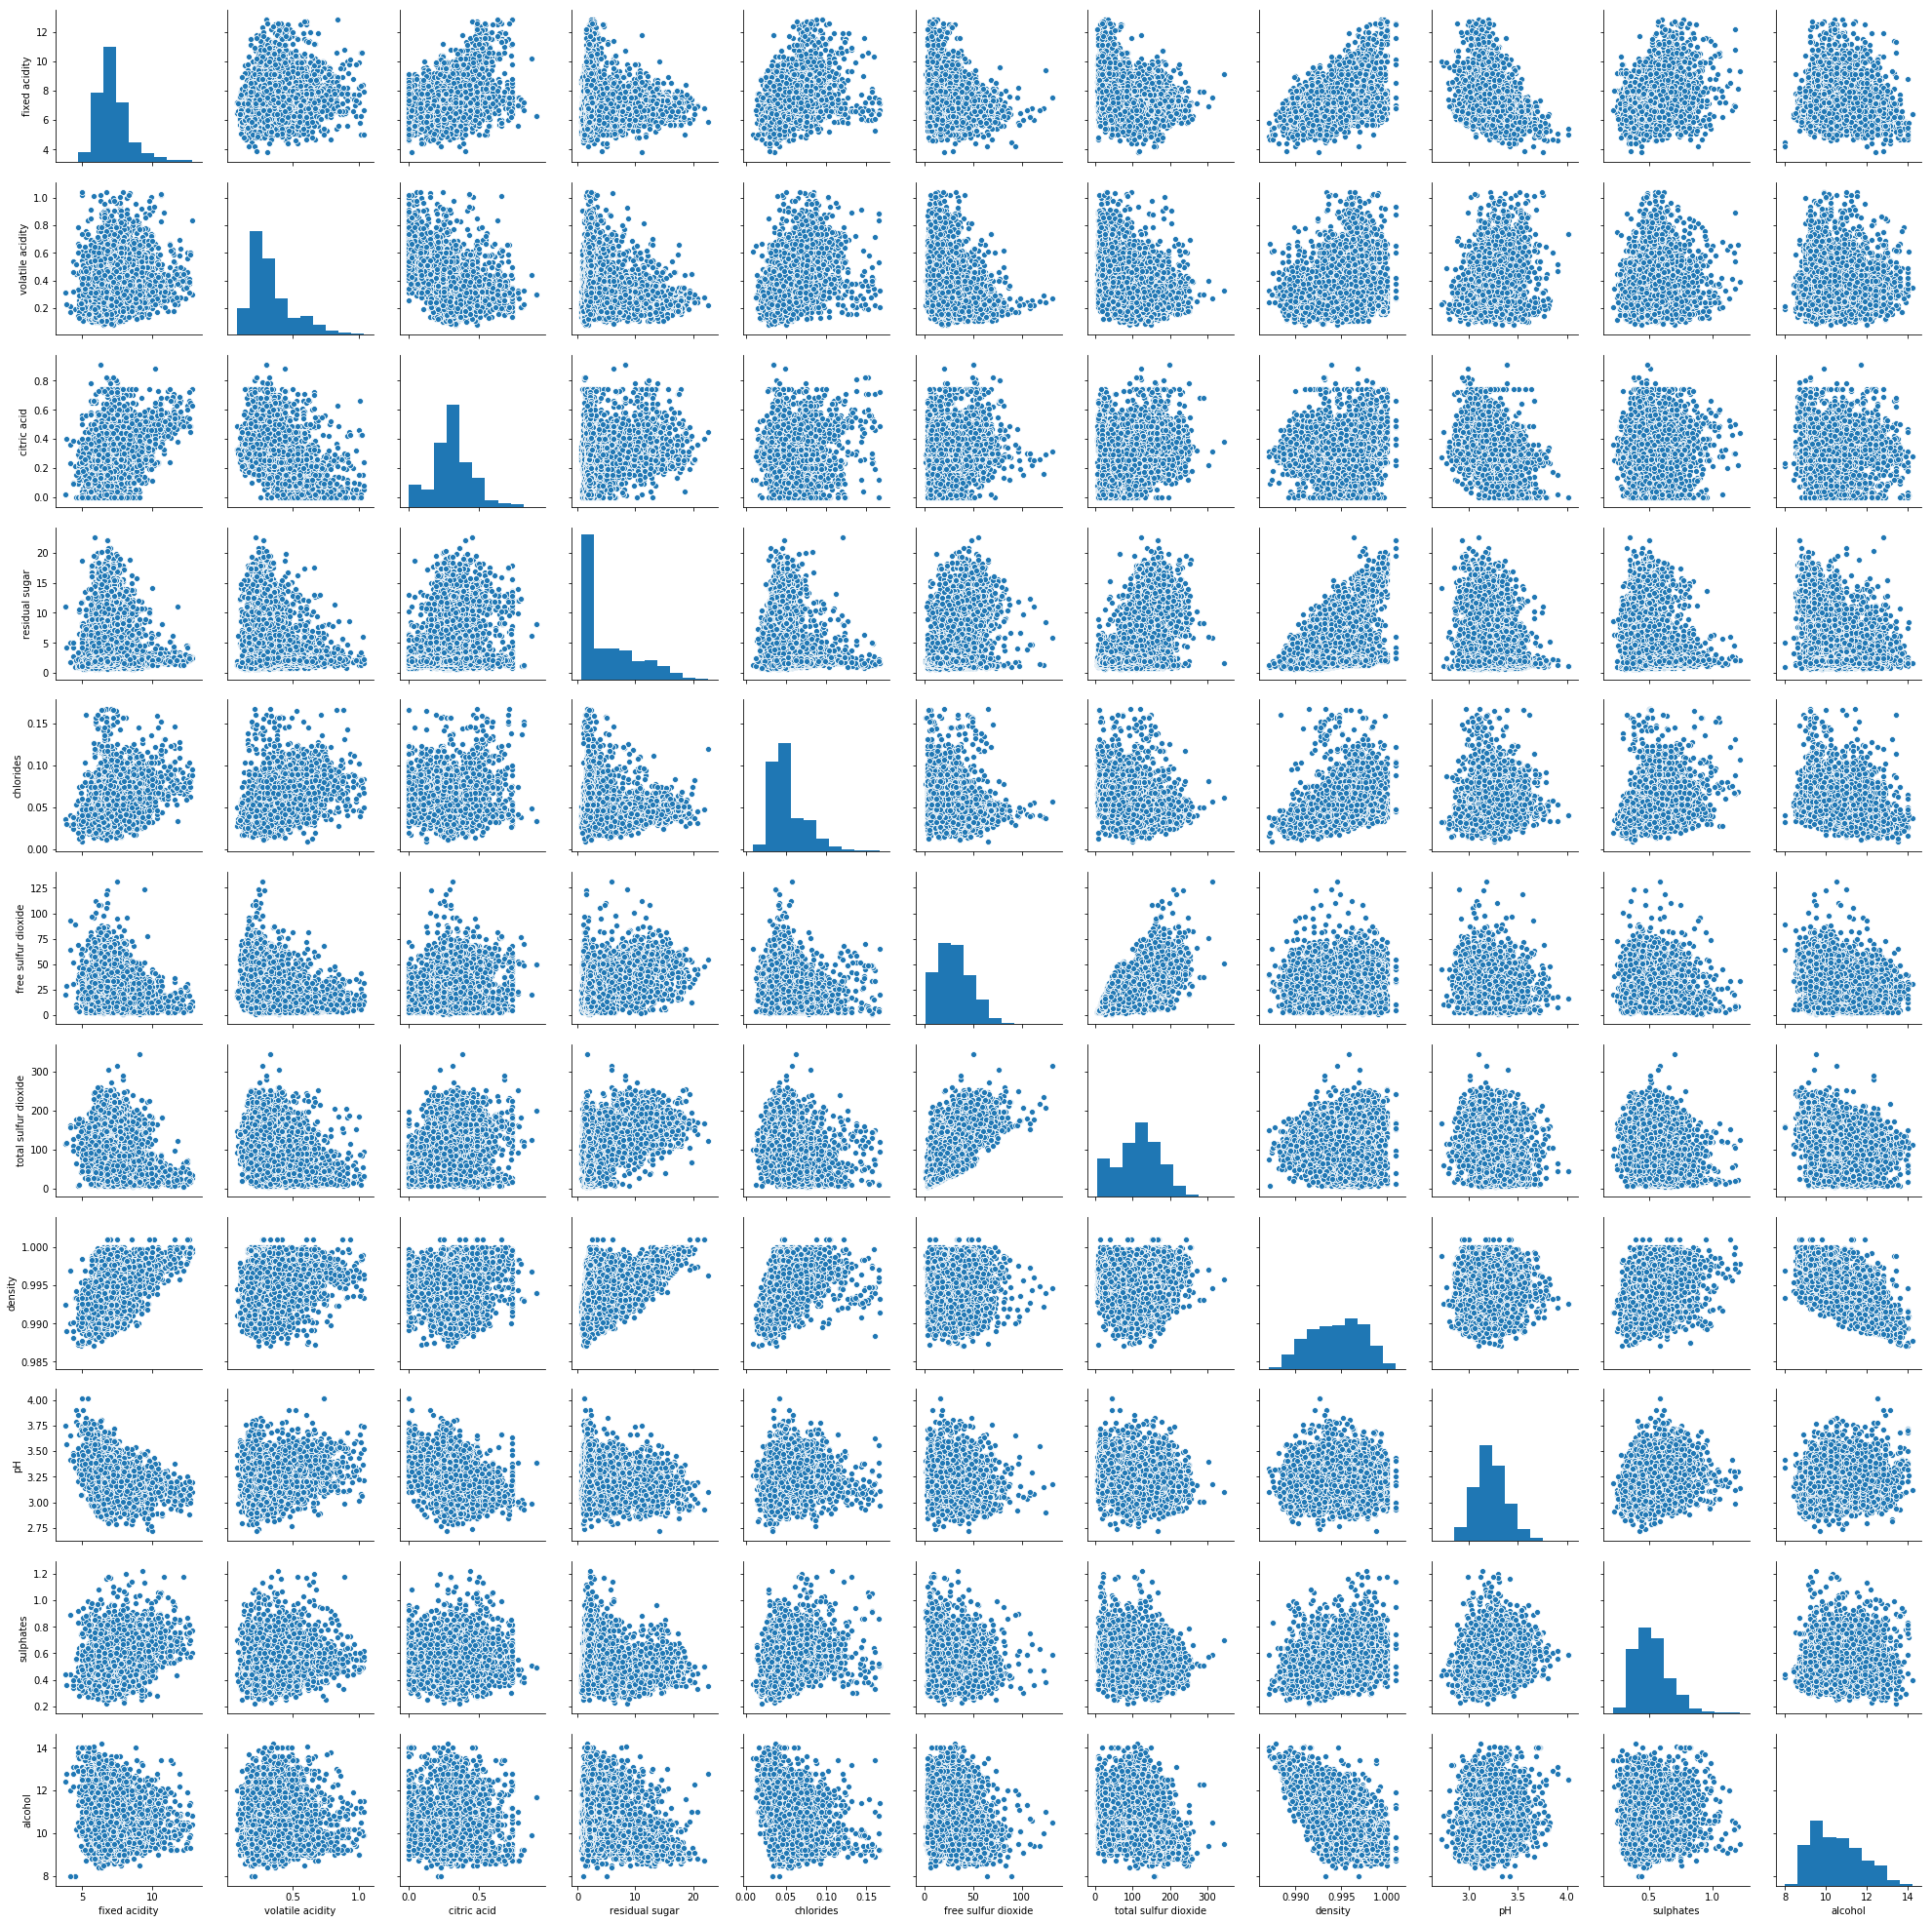

In [48]:
#plt.figure(figsize=(11,7))
sns.pairplot(continuous_features,diag_kind='hist')
#plt.tight_layout()
#plt.plot()

In [49]:
# Coment: notamos alguns padrões de correlações mais visíveis entre algumas features. 
# identificando-se alguns padrões de correlação já um pouco evidentes (embora não extremamente 
#acentuados entre as features.
# como por exemplo entre as features 
#Vamos construir uma matriz de correlaçõa abaixo:

In [50]:
corr = dados11.corr()
corr.style.background_gradient()

In [51]:
# Da matriz de correlações acima, notamos algumas correlações bem expressivas, 
# como no caso das correlações entre density e alcohol (no valor de -0.718073) e especialmente no caso entre
# total sulfur dioxide e free sulfur dioxide, no valor de 0,718797. 

In [52]:
# Embora existam formas de se lidar com features signitivamente correlacionadas 
#(como feature selection, dentre outros procedimentos)
# e de alguns algoritmos de maCHINE lEARNING serem mais robustos a correlações significativas 
#entre features do que outros, 
# se irá aqui eliminar duas features: density (do par de features significativamente 
#correlacionadas, density e alcohol) e  free sulfur dioxide do problema; 
# (do par de features bastante correlacionadas, total sulfur dioxide e free sulfur dioxide) 

# COmo planejamento de experimento alternativo, recomenda-se a utilização de um algortmo de 
#selçeção de features que possam ser utilizados para SVM ou
#por exemplo a utilização de algoritmos como PCA cujo output será necessariamente composto 
#de componentes principais descorrelacionados.

# A eliminação dessas duas features é penas uma primeira abordagem do problema e se deve ao fato 
# de que features razoavelmente multicolineares não devem ser utilizadas com SVM's.

#Recomenda-se a implementação desses procedimentos alternativos e a comparação da performance dos modelos treinados com 

#essas estratégias alternativas com a performance dos modelos treinados com a eatrégia adotada aqui.



In [169]:
# Eliminando-se as features free sulfur dioxide e density
dados12 = dados11.drop(['free sulfur dioxide', 'density'], axis=1)

In [170]:
dados12.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  White            7.0              0.27         0.36            20.7   
1  White            6.3              0.30         0.34             1.6   
2  White            8.1              0.28         0.40             6.9   
3  White            7.2              0.23         0.32             8.5   
4  White            7.2              0.23         0.32             8.5   

   chlorides  total sulfur dioxide    pH  sulphates  alcohol  quality  
0      0.045                 170.0  3.00       0.45      8.8        6  
1      0.049                 132.0  3.30       0.49      9.5        6  
2      0.050                  97.0  3.26       0.44     10.1        6  
3      0.058                 186.0  3.19       0.40      9.9        6  
4      0.058                 186.0  3.19       0.40      9.9        6

In [55]:
dados12.shape

(6191, 11)

In [62]:
# Análise dos valores das features e variável resposta do dataset

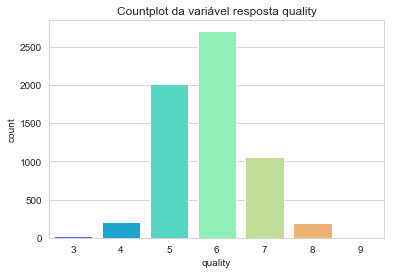

In [56]:
# Gráfico countplot da variável resposta quality

sns.set_style('whitegrid')
sns.countplot(x='quality',data=dados12,palette='rainbow').set_title('Countplot da variável resposta quality')
plt.show()

In [57]:
dados12.groupby('quality')['quality'].count()

quality
3      21
4     207
5    2009
6    2707
7    1051
8     191
9       5
Name: quality, dtype: int64

In [58]:
# Como se pode ver acima, a variável resposta quality possui classes desbalanceadas.
# a grande maioria dos casos está concentrada 
# em qualidades de 5 a 7.
# As classes 4, 8, 3 e 9 são minoritárias, sendo que a classe 9 só possui 5
# casos no dataset
# Não há casos com qualidades de 0, 1, 2 e 10!
# Portanto, como devemos treinar um modelo preditivo da qualidade do
# vinho, estamos lidando com um problema de classificação preditiva
# multiclasse (MAS NÃO MULTILABEL, pois ´apenas uma classe pode ocorrer por
# observação, isto é, não podemos observar simultaneamnete 
# mais uma de uma classe - no caso, mais de uma qualidade - em uma mesma
# oservação)

In [59]:
# Definindo a matriz de features X e o vetor da variável resposta y.
# Label encoding a feature quality

In [60]:
y=dados12['quality']
X = dados12.drop('quality', axis = 1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['type'] = le.fit_transform(dados12['type'])


In [61]:
X.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  total sulfur dioxide    pH  sulphates  alcohol  
0      0.045                 170.0  3.00       0.45      8.8  
1      0.049                 132.0  3.30       0.49      9.5  
2      0.050                  97.0  3.26       0.44     10.1  
3      0.058                 186.0  3.19       0.40      9.9  
4      0.058                 186.0  3.19       0.40      9.9

In [62]:
# Fazendo o random split para criação do conjunto de treinamento e teste.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
y_test.shape

(1858,)

In [65]:
X_train.shape

(4333, 10)

In [66]:
X_test.shape

(1858, 10)

In [67]:
# Iremos usar o algoritmo SMOTE-NC para fazer over sampling das classes minoritárias, no conjunto de treinamento

In [68]:
cat_feats = ['type']

In [69]:
# Usando o algoritmo SMOTE-NC de resampling
sm = SMOTENC(categorical_features= [0],random_state=0, k_neighbors=3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [70]:
X_train_res

array([[ 1.  ,  7.4 ,  0.16, ...,  2.9 ,  0.43,  8.7 ],
       [ 1.  ,  6.2 ,  0.31, ...,  3.16,  0.48,  8.4 ],
       [ 1.  ,  7.2 ,  0.35, ...,  2.93,  0.66, 10.3 ],
       ...,
       [ 1.  ,  6.78,  0.36, ...,  3.33,  0.46, 12.58],
       [ 1.  ,  6.78,  0.33, ...,  3.38,  0.58, 12.42],
       [ 1.  ,  7.67,  0.24, ...,  3.27,  0.48, 12.16]])

In [71]:
X_train_res.shape

(13398, 10)

In [72]:
X_train_res_final = pd.DataFrame(X_train_res,columns=X_train.columns)

In [73]:
X_train_res_final.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   1.0            7.4              0.16         0.27            15.5   
1   1.0            6.2              0.31         0.23             3.3   
2   1.0            7.2              0.35         0.25             5.6   
3   1.0            6.9              0.34         0.74            11.2   
4   1.0            7.7              0.27         0.34             1.8   

   chlorides  total sulfur dioxide    pH  sulphates  alcohol  
0      0.050                 135.0  2.90       0.43      8.7  
1      0.052                 113.0  3.16       0.48      8.4  
2      0.032                 120.0  2.93       0.66     10.3  
3      0.069                 150.0  3.00       0.81      9.2  
4      0.028                 168.0  2.99       0.48     12.1

In [74]:
y_coluna = ['quality']

In [75]:
y_train_res_final = pd.DataFrame(y_train_res,columns=y_coluna)

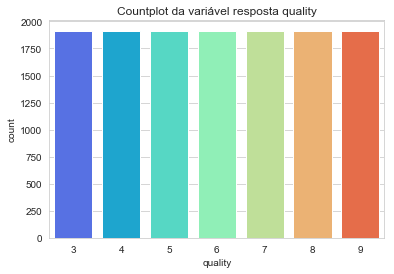

In [76]:
# Plotando as contagens em cada classe após a reamostragem efetuada com o algoritmo SMOTE-NC -
# # Dsitribuição das classes, no conjunto de treinamento após a reamostragem
sns.set_style('whitegrid')
sns.countplot(x='quality',data=y_train_res_final,palette='rainbow').set_title('Countplot da variável resposta quality')
plt.show()

In [77]:
# Distribuição das classes, no conjunto de treinamento após a reamostragem 
y_train_res_final.groupby('quality')['quality'].count()

quality
3    1914
4    1914
5    1914
6    1914
7    1914
8    1914
9    1914
Name: quality, dtype: int64

In [78]:
# Temos agora um total de 13398 obsewrvações de todas as categoriasd, sendo que
# para cada uma temos 1914 observações, no conjunto de treinamento gerado pelo algotimo de resampling SMOTE-NC!!!

In [79]:
# Se irá agora proceder ao scaling das featuress contínuas nos conjuntos de treinamento e teste

In [80]:
X_train_res_final_encoded = X_train_res_final['type']

In [81]:
X_test_encoded = X_test['type']

In [82]:
X_train_res_final_to_scale = X_train_res_final.drop('type', axis = 1)

In [83]:
X_test_to_scale = X_test.drop('type', axis = 1)

In [84]:
X_test_to_scale.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4480            5.9              0.22         0.45            22.6      0.120   
2653            6.4              0.28         0.27            11.0      0.042   
4443            7.2              0.47         0.16             5.9      0.048   
3924            8.6              0.31         0.30             0.9      0.045   
5645            8.6              0.33         0.40             2.6      0.083   

      total sulfur dioxide    pH  sulphates  alcohol  
4480                 122.0  3.10       0.35     12.8  
2653                 148.0  3.14       0.46      8.7  
4443                 125.0  3.09       0.49      9.8  
3924                 109.0  2.95       0.39     10.1  
5645                  68.0  3.30       0.48      9.4

In [85]:
X_test_to_scale = X_test_to_scale.reset_index()
X_test_to_scale = X_test_to_scale.drop('index', axis = 1)
X_test_to_scale.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            5.9              0.22         0.45            22.6      0.120   
1            6.4              0.28         0.27            11.0      0.042   
2            7.2              0.47         0.16             5.9      0.048   
3            8.6              0.31         0.30             0.9      0.045   
4            8.6              0.33         0.40             2.6      0.083   

   total sulfur dioxide    pH  sulphates  alcohol  
0                 122.0  3.10       0.35     12.8  
1                 148.0  3.14       0.46      8.7  
2                 125.0  3.09       0.49      9.8  
3                 109.0  2.95       0.39     10.1  
4                  68.0  3.30       0.48      9.4

In [86]:
X_train_res_final_to_scale.shape

(13398, 9)

In [87]:
# Scaling as features contínuas com StandardScaler, de forma independente 
#nos conjuntos de treinamento e teste para não se incocorrer em Data Leaking
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale  = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
scaled_columns_train  = scaler.fit_transform(X_train_res_final_to_scale[columns_to_scale])
scaled_columns_train


array([[ 1.83e-01, -1.12e+00, -2.90e-01, ..., -2.30e+00, -6.59e-01,
        -1.67e+00],
       [-9.25e-01, -2.89e-01, -6.05e-01, ..., -5.38e-01, -2.32e-01,
        -1.91e+00],
       [-1.93e-03, -6.63e-02, -4.48e-01, ..., -2.10e+00,  1.31e+00,
        -4.00e-01],
       ...,
       [-3.88e-01, -1.07e-02,  1.06e-01, ...,  6.22e-01, -4.17e-01,
         1.41e+00],
       [-3.85e-01, -1.65e-01, -5.41e-03, ...,  9.53e-01,  6.24e-01,
         1.28e+00],
       [ 4.34e-01, -6.51e-01,  5.32e-01, ...,  1.89e-01, -2.59e-01,
         1.08e+00]])

In [88]:
X_train_res_scaled = pd.DataFrame(scaled_columns_train,columns=columns_to_scale)
X_train_res_scaled.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.182615         -1.122914    -0.290056        2.698257   0.110632   
1      -0.924630         -0.288737    -0.605057       -0.383355   0.209425   
2      -0.001926         -0.066290    -0.447557        0.197604  -0.778508   
3      -0.278737         -0.121902     3.411209        1.612115   1.049168   
4       0.459426         -0.511184     0.261196       -0.762242  -0.976095   

   total sulfur dioxide        pH  sulphates   alcohol  
0              0.433409 -2.299509  -0.659126 -1.668705  
1              0.027585 -0.537720  -0.231590 -1.906661  
2              0.156711 -2.096225   1.307538 -0.399609  
3              0.710107 -1.621898   2.590144 -1.272113  
4              1.042145 -1.689659  -0.231590  1.028123

In [89]:
X_train_res_scaled.shape

(13398, 9)

In [90]:
scaled_columns_test  = scaler.fit_transform(X_test_to_scale[columns_to_scale])
scaled_columns_test
X_test_scaled = pd.DataFrame(scaled_columns_test,columns=columns_to_scale)
X_test_scaled.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -1.033753         -0.745768     0.961394        3.770070   3.046841   
1      -0.615443         -0.356653    -0.340341        1.235147  -0.479605   
2       0.053854          0.875543    -1.135846        0.120655  -0.208340   
3       1.225122         -0.162096    -0.123385       -0.971984  -0.343972   
4       1.225122         -0.032391     0.599801       -0.600487   1.374040   

   total sulfur dioxide        pH  sulphates   alcohol  
0              0.116804 -0.756113  -1.253125  1.858907  
1              0.588550 -0.504403  -0.463504 -1.521957  
2              0.171236 -0.819040  -0.248152 -0.614896  
3             -0.119069 -1.700026  -0.965990 -0.367515  
4             -0.862977  0.502438  -0.319936 -0.944736

In [91]:
X_tudo_train_res = X_train_res_scaled.join(X_train_res_final_encoded)

In [92]:
X_tudo_train_res[['type']] = X_tudo_train_res[['type']].astype(int)

In [93]:
X_tudo_train_res.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.182615         -1.122914    -0.290056        2.698257   0.110632   
1      -0.924630         -0.288737    -0.605057       -0.383355   0.209425   
2      -0.001926         -0.066290    -0.447557        0.197604  -0.778508   
3      -0.278737         -0.121902     3.411209        1.612115   1.049168   
4       0.459426         -0.511184     0.261196       -0.762242  -0.976095   

   total sulfur dioxide        pH  sulphates   alcohol  type  
0              0.433409 -2.299509  -0.659126 -1.668705     1  
1              0.027585 -0.537720  -0.231590 -1.906661     1  
2              0.156711 -2.096225   1.307538 -0.399609     1  
3              0.710107 -1.621898   2.590144 -1.272113     1  
4              1.042145 -1.689659  -0.231590  1.028123     1

In [94]:
X_tudo_train_res.shape

(13398, 10)

In [95]:
scaled_columns_test  = scaler.fit_transform(X_test_to_scale[columns_to_scale])
scaled_columns_test
X_test_scaled = pd.DataFrame(scaled_columns_test,columns=columns_to_scale)
#X_test_scaled.head()




In [96]:
X_test_encoded.head()

4480    1
2653    1
4443    1
3924    1
5645    0
Name: type, dtype: int32

In [97]:
# Resetando os índices do dataframe X_test_encoded
X_test_encoded = X_test_encoded.reset_index()
X_test_encoded = X_test_encoded.drop('index', axis=1)
X_test_encoded.head()

type
0     1
1     1
2     1
3     1
4     0

In [98]:
X_tudo_test = X_test_scaled.join(X_test_encoded)

In [99]:
X_tudo_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -1.033753         -0.745768     0.961394        3.770070   3.046841   
1      -0.615443         -0.356653    -0.340341        1.235147  -0.479605   
2       0.053854          0.875543    -1.135846        0.120655  -0.208340   
3       1.225122         -0.162096    -0.123385       -0.971984  -0.343972   
4       1.225122         -0.032391     0.599801       -0.600487   1.374040   

   total sulfur dioxide        pH  sulphates   alcohol  type  
0              0.116804 -0.756113  -1.253125  1.858907     1  
1              0.588550 -0.504403  -0.463504 -1.521957     1  
2              0.171236 -0.819040  -0.248152 -0.614896     1  
3             -0.119069 -1.700026  -0.965990 -0.367515     1  
4             -0.862977  0.502438  -0.319936 -0.944736     0

In [100]:
X_tudo_test[['type']] = X_tudo_test[['type']].astype(int)
X_tudo_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -1.033753         -0.745768     0.961394        3.770070   3.046841   
1      -0.615443         -0.356653    -0.340341        1.235147  -0.479605   
2       0.053854          0.875543    -1.135846        0.120655  -0.208340   
3       1.225122         -0.162096    -0.123385       -0.971984  -0.343972   
4       1.225122         -0.032391     0.599801       -0.600487   1.374040   

   total sulfur dioxide        pH  sulphates   alcohol  type  
0              0.116804 -0.756113  -1.253125  1.858907     1  
1              0.588550 -0.504403  -0.463504 -1.521957     1  
2              0.171236 -0.819040  -0.248152 -0.614896     1  
3             -0.119069 -1.700026  -0.965990 -0.367515     1  
4             -0.862977  0.502438  -0.319936 -0.944736     0

In [101]:
y_train_res_final.head()

quality
0        7
1        5
2        7
3        5
4        7

In [102]:
# COntagens das categorias em y_test
y_test.value_counts()

6    793
5    616
7    318
4     62
8     59
3      9
9      1
Name: quality, dtype: int64

In [112]:
# Treinamento de classificadores com GridSearch
# e com o conjunto de treinamento obtido por up sampling das classes com o algoritmo SMOTE-NC

In [120]:
# 1a Abordagem: Treinamento de um classificador SVM, com kernel RBF, e conjunto de treinamento com classes balanceadas 
# por meio de reamostragem (superamostragem, ou up sampling das classes minoritárias) com o algoritmo SMOTE-NC
# E uso de Grid Search, e usando como scoring de cross validação, a métrica F1, com estratégia de micro average
# Cross Validação com 4-fold

In [155]:
param_grid = {'C': [0.1,1, 5, 8, 10, 50, 100, 1000], 'gamma': [0.001,0.01,0.05,0.1,1,10,100], 'kernel': ['rbf']}

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
# Treinando o classificador SVM com kernel RBF, GridSearch no conjunto de treinamento obtido com SMOTE-NC
grid_f1_score_com_smotenc = GridSearchCV(SVC(),param_grid,refit=True,verbose=1, scoring='f1_micro', cv=4)
grid_f1_score_com_smotenc.fit(X_tudo_train_res,y_train_res_final.values.ravel())

Fitting 4 folds for each of 56 candidates, totalling 224 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed: 28.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 5, 8, 10, 50, 100, 1000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=1)

In [159]:
# Scores Médios de validação cruzada em cada combinação de hiperparametros
res = grid_f1_score_com_smotenc.cv_results_['mean_train_score'].reshape(-1, 1)
res

array([[0.32],
       [0.5 ],
       [0.6 ],
       [0.65],
       [0.8 ],
       [0.55],
       [0.46],
       [0.49],
       [0.57],
       [0.69],
       [0.75],
       [0.96],
       [1.  ],
       [1.  ],
       [0.52],
       [0.65],
       [0.75],
       [0.81],
       [0.99],
       [1.  ],
       [1.  ],
       [0.53],
       [0.65],
       [0.76],
       [0.83],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.54],
       [0.66],
       [0.77],
       [0.84],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.56],
       [0.69],
       [0.83],
       [0.89],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.58],
       [0.71],
       [0.85],
       [0.91],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.65],
       [0.77],
       [0.91],
       [0.97],
       [1.  ],
       [1.  ],
       [1.  ]])

In [160]:
# Matriz de confusão e relatório de classificação no conjunto de treinamento
grid_f1_score_com_smotenc_predictions_train = grid_f1_score_com_smotenc.predict(X_tudo_train_res)
print(confusion_matrix(y_train_res_final, grid_f1_score_com_smotenc_predictions_train))


[[1914    0    0    0    0    0    0]
 [   0 1914    0    0    0    0    0]
 [   0    0 1900   13    1    0    0]
 [   0    0    8 1887   18    1    0]
 [   0    1    0    1 1911    1    0]
 [   0    0    0    0    0 1914    0]
 [   0    0    0    0    0    0 1914]]


In [161]:
# Classification report com o melhor modelo no GriDSearch
print(classification_report(y_train_res_final, grid_f1_score_com_smotenc_predictions_train))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1914
           4       1.00      1.00      1.00      1914
           5       1.00      0.99      0.99      1914
           6       0.99      0.99      0.99      1914
           7       0.99      1.00      0.99      1914
           8       1.00      1.00      1.00      1914
           9       1.00      1.00      1.00      1914

   micro avg       1.00      1.00      1.00     13398
   macro avg       1.00      1.00      1.00     13398
weighted avg       1.00      1.00      1.00     13398



In [162]:
# Melhor combinação de hiperparÂmetros encontrada para o SVC:
grid_f1_score_com_smotenc.best_params_

{'C': 8, 'gamma': 1, 'kernel': 'rbf'}

In [163]:
# Melhor estimador baseado nos scores de validação cruzada:
grid_f1_score_com_smotenc.best_estimator_

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [166]:
# Matriz de confusão n oconjunto de teste
grid_f1_score_com_smotenc_predictions = grid_f1_score_com_smotenc.predict(X_tudo_test)
print(confusion_matrix(y_test, grid_f1_score_com_smotenc_predictions))


[[  0   0   2   7   0   0   0]
 [  0  13  24  22   2   1   0]
 [  2  34 357 195  25   3   0]
 [  1  30 135 510 102  14   1]
 [  0   2  13 108 176  19   0]
 [  0   0   1  21  17  20   0]
 [  0   0   0   1   0   0   0]]


In [167]:
# Relatório de classificação no conjunto de teste
print(classification_report(y_test, grid_f1_score_com_smotenc_predictions))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.16      0.21      0.18        62
           5       0.67      0.58      0.62       616
           6       0.59      0.64      0.62       793
           7       0.55      0.55      0.55       318
           8       0.35      0.34      0.34        59
           9       0.00      0.00      0.00         1

   micro avg       0.58      0.58      0.58      1858
   macro avg       0.33      0.33      0.33      1858
weighted avg       0.58      0.58      0.58      1858



In [168]:
# Acurácia média do modelo no conjunto de teste
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, grid_f1_score_com_smotenc_predictions))


0.5791173304628633


In [138]:
# 2a Abordagem: Treinamento de um classificador SVM, com kernel RBF, e conjunto de treinamento com classes balanceadas 
# por meio de reamostragem (superamostragem, ou up sampling das classes minoritárias) com o algoritmo SMOTE-NC
# E uso de Grid Search, e usando como scoring de cross validação, a métrica Acurácia, com estratégia de micro average
# Cross Validação com 4-fold

In [125]:
grid_accuracy_score_com_smotenc = GridSearchCV(SVC(),param_grid,refit=True,verbose=1, scoring='accuracy', cv=4)

In [126]:
grid_accuracy_score_com_smotenc.fit(X_tudo_train_res,y_train_res_final.values.ravel())

Fitting 4 folds for each of 56 candidates, totalling 224 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed: 31.8min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 5, 8, 10, 50, 100, 1000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [128]:
# Scores Médios de validação cruzada (acurácias médias) em cada combinação de hiperparametros
res = grid_accuracy_score_com_smotenc.cv_results_['mean_train_score'].reshape(-1, 1)
res

array([[0.32],
       [0.5 ],
       [0.6 ],
       [0.65],
       [0.8 ],
       [0.55],
       [0.46],
       [0.49],
       [0.57],
       [0.69],
       [0.75],
       [0.96],
       [1.  ],
       [1.  ],
       [0.52],
       [0.65],
       [0.75],
       [0.81],
       [0.99],
       [1.  ],
       [1.  ],
       [0.53],
       [0.65],
       [0.76],
       [0.83],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.54],
       [0.66],
       [0.77],
       [0.84],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.56],
       [0.69],
       [0.83],
       [0.89],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.58],
       [0.71],
       [0.85],
       [0.91],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.65],
       [0.77],
       [0.91],
       [0.97],
       [1.  ],
       [1.  ],
       [1.  ]])

In [129]:
# Matriz de confusão e relatório de classificação no conjunto de treinamento, melhor modelo
grid_accuracy_score_com_smotenc_predictions_train = grid_accuracy_score_com_smotenc.predict(X_tudo_train_res)
print(confusion_matrix(y_train_res_final, grid_accuracy_score_com_smotenc_predictions_train))


[[1914    0    0    0    0    0    0]
 [   0 1914    0    0    0    0    0]
 [   0    0 1900   13    1    0    0]
 [   0    0    8 1887   18    1    0]
 [   0    1    0    1 1911    1    0]
 [   0    0    0    0    0 1914    0]
 [   0    0    0    0    0    0 1914]]


In [130]:
# Relatório de classificação do melhor modelo no conjunto de treinamento
print(classification_report(y_train_res_final, grid_accuracy_score_com_smotenc_predictions_train))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1914
           4       1.00      1.00      1.00      1914
           5       1.00      0.99      0.99      1914
           6       0.99      0.99      0.99      1914
           7       0.99      1.00      0.99      1914
           8       1.00      1.00      1.00      1914
           9       1.00      1.00      1.00      1914

   micro avg       1.00      1.00      1.00     13398
   macro avg       1.00      1.00      1.00     13398
weighted avg       1.00      1.00      1.00     13398



In [131]:
# Melhor escolha de hiperparâmetros:
grid_accuracy_score_com_smotenc.best_params_

{'C': 8, 'gamma': 1, 'kernel': 'rbf'}

In [132]:
# Melhor estimador baseado nos scores de validação cruzada:
grid_accuracy_score_com_smotenc.best_estimator_ 

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Avaliação no conjunto de teste

In [134]:
# Matriz de confusão n oconjunto de teste, melhor modelo
grid_accuracy_score_com_smotenc_predictions = grid_accuracy_score_com_smotenc.predict(X_tudo_test)
print(confusion_matrix(y_test, grid_accuracy_score_com_smotenc_predictions))


[[  0   0   2   7   0   0   0]
 [  0  13  24  22   2   1   0]
 [  2  34 357 195  25   3   0]
 [  1  30 135 510 102  14   1]
 [  0   2  13 108 176  19   0]
 [  0   0   1  21  17  20   0]
 [  0   0   0   1   0   0   0]]


In [135]:
# Relatório de classificação no conjunto de teste, melhor modelo
print(classification_report(y_test, grid_accuracy_score_com_smotenc_predictions))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.16      0.21      0.18        62
           5       0.67      0.58      0.62       616
           6       0.59      0.64      0.62       793
           7       0.55      0.55      0.55       318
           8       0.35      0.34      0.34        59
           9       0.00      0.00      0.00         1

   micro avg       0.58      0.58      0.58      1858
   macro avg       0.33      0.33      0.33      1858
weighted avg       0.58      0.58      0.58      1858



In [136]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, grid_accuracy_score_com_smotenc_predictions))


0.5791173304628633


In [204]:
# A acurácia do SVM treinado, no conjunto de teste foi de 58%

In [ ]:
# O classificador SVM obteve acurácia de 58% no conjunto de teste
# Como se pode constatar do relatório de classificação acima, as classes minoritárias no conjunto 
# de teste tiveram baixíssimos Precision e Recall (portanto de F1-score também). 
# No caso das classes minoritárias 3 e 9, com muitpoucas observações no conjunto de treinamento, 
# o classificador obteve valores nulos para estas métricas, nessas classes.


In [190]:
# 3a Solução, Usando Random Forest com Grid Search no conjunto de treinamento com resampling por 
# SMOTE-NC

In [137]:
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=0) 

In [138]:
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [139]:
gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=4,
                     n_jobs=-1)

In [140]:
#gd_sr.fit(X_train, y_train)  
gd_sr.fit(X_tudo_train_res,y_train_res_final.values.ravel())

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500, 800, 1000], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [141]:
# Scores Médios de validação cruzada (acurácias médias) em cada combinação de hiperparametros
res = gd_sr.cv_results_['mean_train_score'].reshape(-1, 1)

res


C:\soft\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [142]:
# Matriz de confusão e relatório de classificação no conjunto de treinamento, melhor modelo
gd_sr_predictions_train = gd_sr.predict(X_tudo_train_res)
print(confusion_matrix(y_train_res_final, gd_sr_predictions_train))


[[1914    0    0    0    0    0    0]
 [   0 1914    0    0    0    0    0]
 [   0    0 1914    0    0    0    0]
 [   0    0    0 1914    0    0    0]
 [   0    0    0    0 1914    0    0]
 [   0    0    0    0    0 1914    0]
 [   0    0    0    0    0    0 1914]]


In [143]:
# Relatório de classificação no conjunto de treinamento
print(classification_report(y_train_res_final, gd_sr_predictions_train))


              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1914
           4       1.00      1.00      1.00      1914
           5       1.00      1.00      1.00      1914
           6       1.00      1.00      1.00      1914
           7       1.00      1.00      1.00      1914
           8       1.00      1.00      1.00      1914
           9       1.00      1.00      1.00      1914

   micro avg       1.00      1.00      1.00     13398
   macro avg       1.00      1.00      1.00     13398
weighted avg       1.00      1.00      1.00     13398



In [ ]:
# A flaorest aleatória acima apresenta sintomas de overfitting no conj de treinamento

In [144]:
# Melhor escolha de hiperparâmetros:
gd_sr.best_params_


{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 1000}

In [145]:
# Melhor estimador baseado nos scores de validação cruzada:
gd_sr.best_estimator_


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
# Avaliação no conjunto de teste

In [147]:
# Matriz de confusão n oconjunto de teste
gd_sr_predictions = gd_sr.predict(X_tudo_test)
print(confusion_matrix(y_test, gd_sr_predictions))


[[  0   0   1   7   1   0   0]
 [  0  19  26   9   4   4   0]
 [  7  70 359 149  25   6   0]
 [  3  40 124 426 174  23   3]
 [  0   3  11  92 192  18   2]
 [  0   0   0  10  29  19   1]
 [  0   0   0   0   1   0   0]]


In [148]:
# Relatório de classificação no conjunto de teste
print(classification_report(y_test, gd_sr_predictions))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.14      0.31      0.20        62
           5       0.69      0.58      0.63       616
           6       0.61      0.54      0.57       793
           7       0.45      0.60      0.52       318
           8       0.27      0.32      0.29        59
           9       0.00      0.00      0.00         1

   micro avg       0.55      0.55      0.55      1858
   macro avg       0.31      0.34      0.32      1858
weighted avg       0.58      0.55      0.56      1858



In [149]:
# Acurácia média do modelo no conjunto de teste
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, gd_sr_predictions))


0.5462863293864371


In [ ]:
# Acessando a importância das features com feature_importance_ 

In [153]:
importance = gd_sr.best_estimator_.feature_importances_
importance

array([0.11, 0.11, 0.09, 0.09, 0.14, 0.13, 0.1 , 0.08, 0.14, 0.01])

In [154]:
X_tudo_train_res.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [ ]:
# Assim, as features mais importantes, de acordo com o método feature_importances_
# da melhor floresta aleatória treinada foi
# (em ordem decrescente):




1) chlorides e alcohol (0.14)
2) total sulfur dioxide (0.13)
3) fixed acidity e volatile acidity (o.11)
4) pH (0.10)
5) citric acid e residual sugar (0.09)
6) sulphates (0.08)
7) type(0.01)

In [ ]:
# 4a Abordagem: Treinamento de um classificador SVM, com kernel Linear, e conjunto de treinamento com classes balanceadas 
# por meio de reamostragem (superamostragem, ou up sampling das classes minoritárias) com o algoritmo SMOTE-NC
# E uso de Grid Search, e usando como scoring de cross validação, a métrica F1-score, com estratégia de micro average
# Cross Validação com 4-fold


In [103]:
param_grid = {'C': [5, 6, 7, 8, 9],  'kernel': ['linear']}

In [104]:
grid_linearsvc = GridSearchCV(SVC(),param_grid,refit=True,verbose=1, scoring='accuracy', cv=4)

In [105]:
grid_linearsvc.fit(X_tudo_train_res,y_train_res_final.values.ravel())

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.4min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [5, 6, 7, 8, 9], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [106]:
# Scores Médios de validação cruzada (acurácias médias) em cada combinação de hiperparametros
res = grid_linearsvc.cv_results_['mean_train_score'].reshape(-1, 1)

C:\soft\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [107]:
res

array([[0.54],
       [0.54],
       [0.54],
       [0.54],
       [0.54]])

In [111]:
# Matriz de confusão e relatório de classificação no conjunto de treinamento
grid_linearsvc_predictions_train = grid_linearsvc.predict(X_tudo_train_res)
print(confusion_matrix(y_train_res_final, grid_linearsvc_predictions_train))

[[1355  163  105  193   12   86    0]
 [ 440  816  350  141  108   59    0]
 [ 365  282  807  279  122   57    2]
 [ 201  149  450  430  376  300    8]
 [  71   60  138  252  718  665   10]
 [  20   68  200   41  404 1178    3]
 [   0    0    0    0    0    0 1914]]


In [112]:
print(classification_report(y_train_res_final, grid_linearsvc_predictions_train))

              precision    recall  f1-score   support

           3       0.55      0.71      0.62      1914
           4       0.53      0.43      0.47      1914
           5       0.39      0.42      0.41      1914
           6       0.32      0.22      0.26      1914
           7       0.41      0.38      0.39      1914
           8       0.50      0.62      0.55      1914
           9       0.99      1.00      0.99      1914

   micro avg       0.54      0.54      0.54     13398
   macro avg       0.53      0.54      0.53     13398
weighted avg       0.53      0.54      0.53     13398



In [116]:
# Melhor escolha de hiperparâmetros:
grid_linearsvc.best_params_

{'C': 7, 'kernel': 'linear'}

In [117]:
# Melhor estimador baseado nos scores de validação cruzada:
grid_linearsvc.best_estimator_

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Avaliação no conjunto de teste

In [118]:
# Matriz de confusão n oconjunto de teste
grid_linearsvc_predictions = grid_linearsvc.predict(X_tudo_test)
print(confusion_matrix(y_test, grid_linearsvc_predictions))

[[  1   0   1   1   3   1   2]
 [ 25  10  12   4   9   2   0]
 [203 112 168  64  37  30   2]
 [ 95  69 101 159 194 165  10]
 [ 18   8  23  29 115 114  11]
 [  1   3   4   2  15  31   3]
 [  0   0   0   0   0   0   1]]


In [119]:
# Relatório de classificação no conjunto de teste
print(classification_report(y_test, grid_linearsvc_predictions))

              precision    recall  f1-score   support

           3       0.00      0.11      0.01         9
           4       0.05      0.16      0.08        62
           5       0.54      0.27      0.36       616
           6       0.61      0.20      0.30       793
           7       0.31      0.36      0.33       318
           8       0.09      0.53      0.15        59
           9       0.03      1.00      0.07         1

   micro avg       0.26      0.26      0.26      1858
   macro avg       0.23      0.38      0.19      1858
weighted avg       0.50      0.26      0.31      1858



In [122]:
# Resultados no conjunto de teste
# Acurácias médias no conjunto de teste, de cada um dos cinco modelos treinados
#res_test = grid_linearsvc.cv_results_['mean_test_score'].reshape(-1, 1)
#res_test

In [121]:
# Acurácia média do modelo no conjunto de teste
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, grid_linearsvc_predictions))


0.26103336921420883


In [ ]:
# 5a Abordagem:

#Treinamento de um classificador SVM, com kernel RBF, e conjunto de treinamento com classes balanceadas 

# E uso de Grid Search, e usando como scoring de cross validação, a métrica F1-score, com estratégia de micro average
# Cross Validação com 4-fold

# Iremos fazer reamostragem (com repoisção), up sampling Naive , das classes minoritárias 
# de forma a que todas igualem a contagem
# da classe de maior frequência, a classe 6; isto é, de forma a que a contagem no 
# dataframe final, de todas as classes seja exatamente 
# igual a 2707.
# Na super amostragem naive, se faz um super sampling das classes minoritárias, se repetindo 
# as linhas de dados corrspondentes À cada uma das classes minoritárias.
# É sabido que esse tipo de reamostragem tende a gerar classificadores 
# superajustados (overfitted) ao conjunto de treinamento
# No entanto, se buscou também esse caminho com fins de comparação com as soluções prévias.

In [188]:
# Usando Naive Oversampling :

In [171]:
df_classe_3 = dados12[dados12.quality==3]

In [172]:
df_classe_3.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
251  White            8.5              0.26         0.21            16.2   
253  White            5.8              0.24         0.44             3.5   
294  White            9.1              0.59         0.38             1.6   
445  White            7.1              0.32         0.32            11.0   
740  White            6.9              0.39         0.40             4.6   

     chlorides  total sulfur dioxide    pH  sulphates  alcohol  quality  
251      0.074                 197.0  3.02       0.50      9.8        3  
253      0.029                 109.0  3.53       0.43     11.7        3  
294      0.066                 182.0  3.23       0.38      8.5        3  
445      0.038                  66.0  3.24       0.40     11.5        3  
740      0.022                  19.0  3.31       0.37     12.6        3

In [173]:
df_classe_3.count()

type                    21
fixed acidity           21
volatile acidity        21
citric acid             21
residual sugar          21
chlorides               21
total sulfur dioxide    21
pH                      21
sulphates               21
alcohol                 21
quality                 21
dtype: int64

In [174]:
# numero de observações a serem geradas com classe 3:
2707-21


2686

In [175]:
df_classe_3_upsampled = resample(df_classe_3, 
                                 replace=True,     
                                 n_samples=2707,    
                                 random_state=0) 

In [176]:
df_classe_3_upsampled.count()

type                    2707
fixed acidity           2707
volatile acidity        2707
citric acid             2707
residual sugar          2707
chlorides               2707
total sulfur dioxide    2707
pH                      2707
sulphates               2707
alcohol                 2707
quality                 2707
dtype: int64

In [177]:
df_classe_3_upsampled.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
3265  White            4.2             0.215         0.23             5.1   
3810  White            6.8             0.260         0.34            15.1   
251   White            8.5             0.260         0.21            16.2   
445   White            7.1             0.320         0.32            11.0   
445   White            7.1             0.320         0.32            11.0   

      chlorides  total sulfur dioxide    pH  sulphates  alcohol  quality  
3265      0.041                 157.0  3.42       0.44      8.0        3  
3810      0.060                 162.0  3.24       0.52     10.5        3  
251       0.074                 197.0  3.02       0.50      9.8        3  
445       0.038                  66.0  3.24       0.40     11.5        3  
445       0.038                  66.0  3.24       0.40     11.5        3

In [178]:
df_classe_4 = dados12[dados12.quality==4]
df_classe_4_upsampled = resample(df_classe_4, 
                                 replace=True,     
                                 n_samples=2707,    
                                 random_state=0) 

In [179]:
df_classe_5 = dados12[dados12.quality==5]
df_classe_5_upsampled = resample(df_classe_5, 
                                 replace=True,     
                                 n_samples=2707,    
                                 random_state=0) 

In [180]:
df_classe_6 = dados12[dados12.quality==6]

In [181]:
df_classe_7 = dados12[dados12.quality==7]
df_classe_7_upsampled = resample(df_classe_7, 
                                 replace=True,     
                                 n_samples=2707,    
                                 random_state=0) 

In [182]:
df_classe_8 = dados12[dados12.quality==8]
df_classe_8_upsampled = resample(df_classe_8, 
                                 replace=True,     
                                 n_samples=2707,    
                                 random_state=0) 

In [183]:
df_classe_9 = dados12[dados12.quality==9]
df_classe_9_upsampled = resample(df_classe_9, 
                                 replace=True,     
                                 n_samples=2707,    
                                 random_state=0) 

In [184]:
df_classe_6 = dados12[dados12.quality==6]

In [185]:
df_classe_3.shape

(21, 11)

In [186]:
df_classe_3_upsampled.shape

(2707, 11)

In [187]:
# Alterando os índices dos dataframes antes da concatenação

In [188]:
df_classe_3_upsampled.index = pd.RangeIndex(0,0 + len(df_classe_3_upsampled))
#df_classe_3_upsampled

In [189]:
#df_classe_9_upsampled
df_classe_4_upsampled.shape

(2707, 11)

In [190]:
df_classe_4_upsampled.index = pd.RangeIndex(2707,2707 + len(df_classe_4_upsampled))
#df_classe_4_upsampled

In [191]:
df_classe_4_upsampled.shape

(2707, 11)

In [192]:
df_classe_5_upsampled.index = pd.RangeIndex(5414,5414 + len(df_classe_5_upsampled))
#df_classe_5_upsampled

In [193]:
df_classe_5_upsampled.shape

(2707, 11)

In [194]:
df_classe_6_upsampled = df_classe_6

In [195]:
df_classe_6_upsampled.index = pd.RangeIndex(8121,8121 + len(df_classe_6_upsampled))
#df_classe_6_upsampled

In [196]:
df_classe_6_upsampled.shape

(2707, 11)

In [197]:
df_classe_7_upsampled.index = pd.RangeIndex(10828,10828 + len(df_classe_7_upsampled))
#df_classe_7_upsampled

In [198]:
df_classe_8_upsampled.index = pd.RangeIndex(13535,13535 + len(df_classe_8_upsampled))
#df_classe_8_upsampled

In [199]:
df_classe_9_upsampled.index = pd.RangeIndex(16242,16242 + len(df_classe_9_upsampled))
#df_classe_9_upsampled

In [200]:
frames = [df_classe_3_upsampled, df_classe_4_upsampled,df_classe_5_upsampled,
          df_classe_6_upsampled, df_classe_7_upsampled,df_classe_8_upsampled,
         df_classe_9_upsampled]

In [201]:
dados13 = pd.concat(frames)

In [202]:
dados13.shape

(18949, 11)

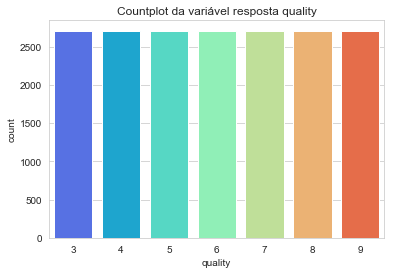

In [203]:
# Checando o balanceamento das classes
sns.set_style('whitegrid')
sns.countplot(x='quality',data=dados13,palette='rainbow').set_title('Countplot da variável resposta quality')
plt.show()

In [204]:
dados13.groupby('quality')['quality'].count()

quality
3    2707
4    2707
5    2707
6    2707
7    2707
8    2707
9    2707
Name: quality, dtype: int64

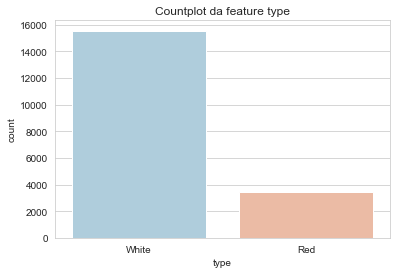

In [205]:
# Gráfico countplot da feature type

sns.set_style('whitegrid')
sns.countplot(x='type',data=dados13,palette='RdBu_r').set_title('Countplot da feature type')
plt.show()

In [206]:
dados13.groupby('type')['type'].count()

type
Red       3406
White    15543
Name: type, dtype: int64

In [208]:
continuous_features = dados[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [209]:
continuous_features.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates alcohol  
0                 45.0                 170.0   1.0010  3.00       0.45     8.8  
1                 14.0                 132.0   0.9940  3.30       0.49     9.5  
2                 30.0                  97.0   0.9951  3.26       0.44    10.1  
3                 47.0                 186.0   0.9956  3.19       0.40     9.9  
4                 47.0                 186.0   0.9956  3.19       0.40     9.9

In [210]:
# Correlation matrix antre features não-categóricas

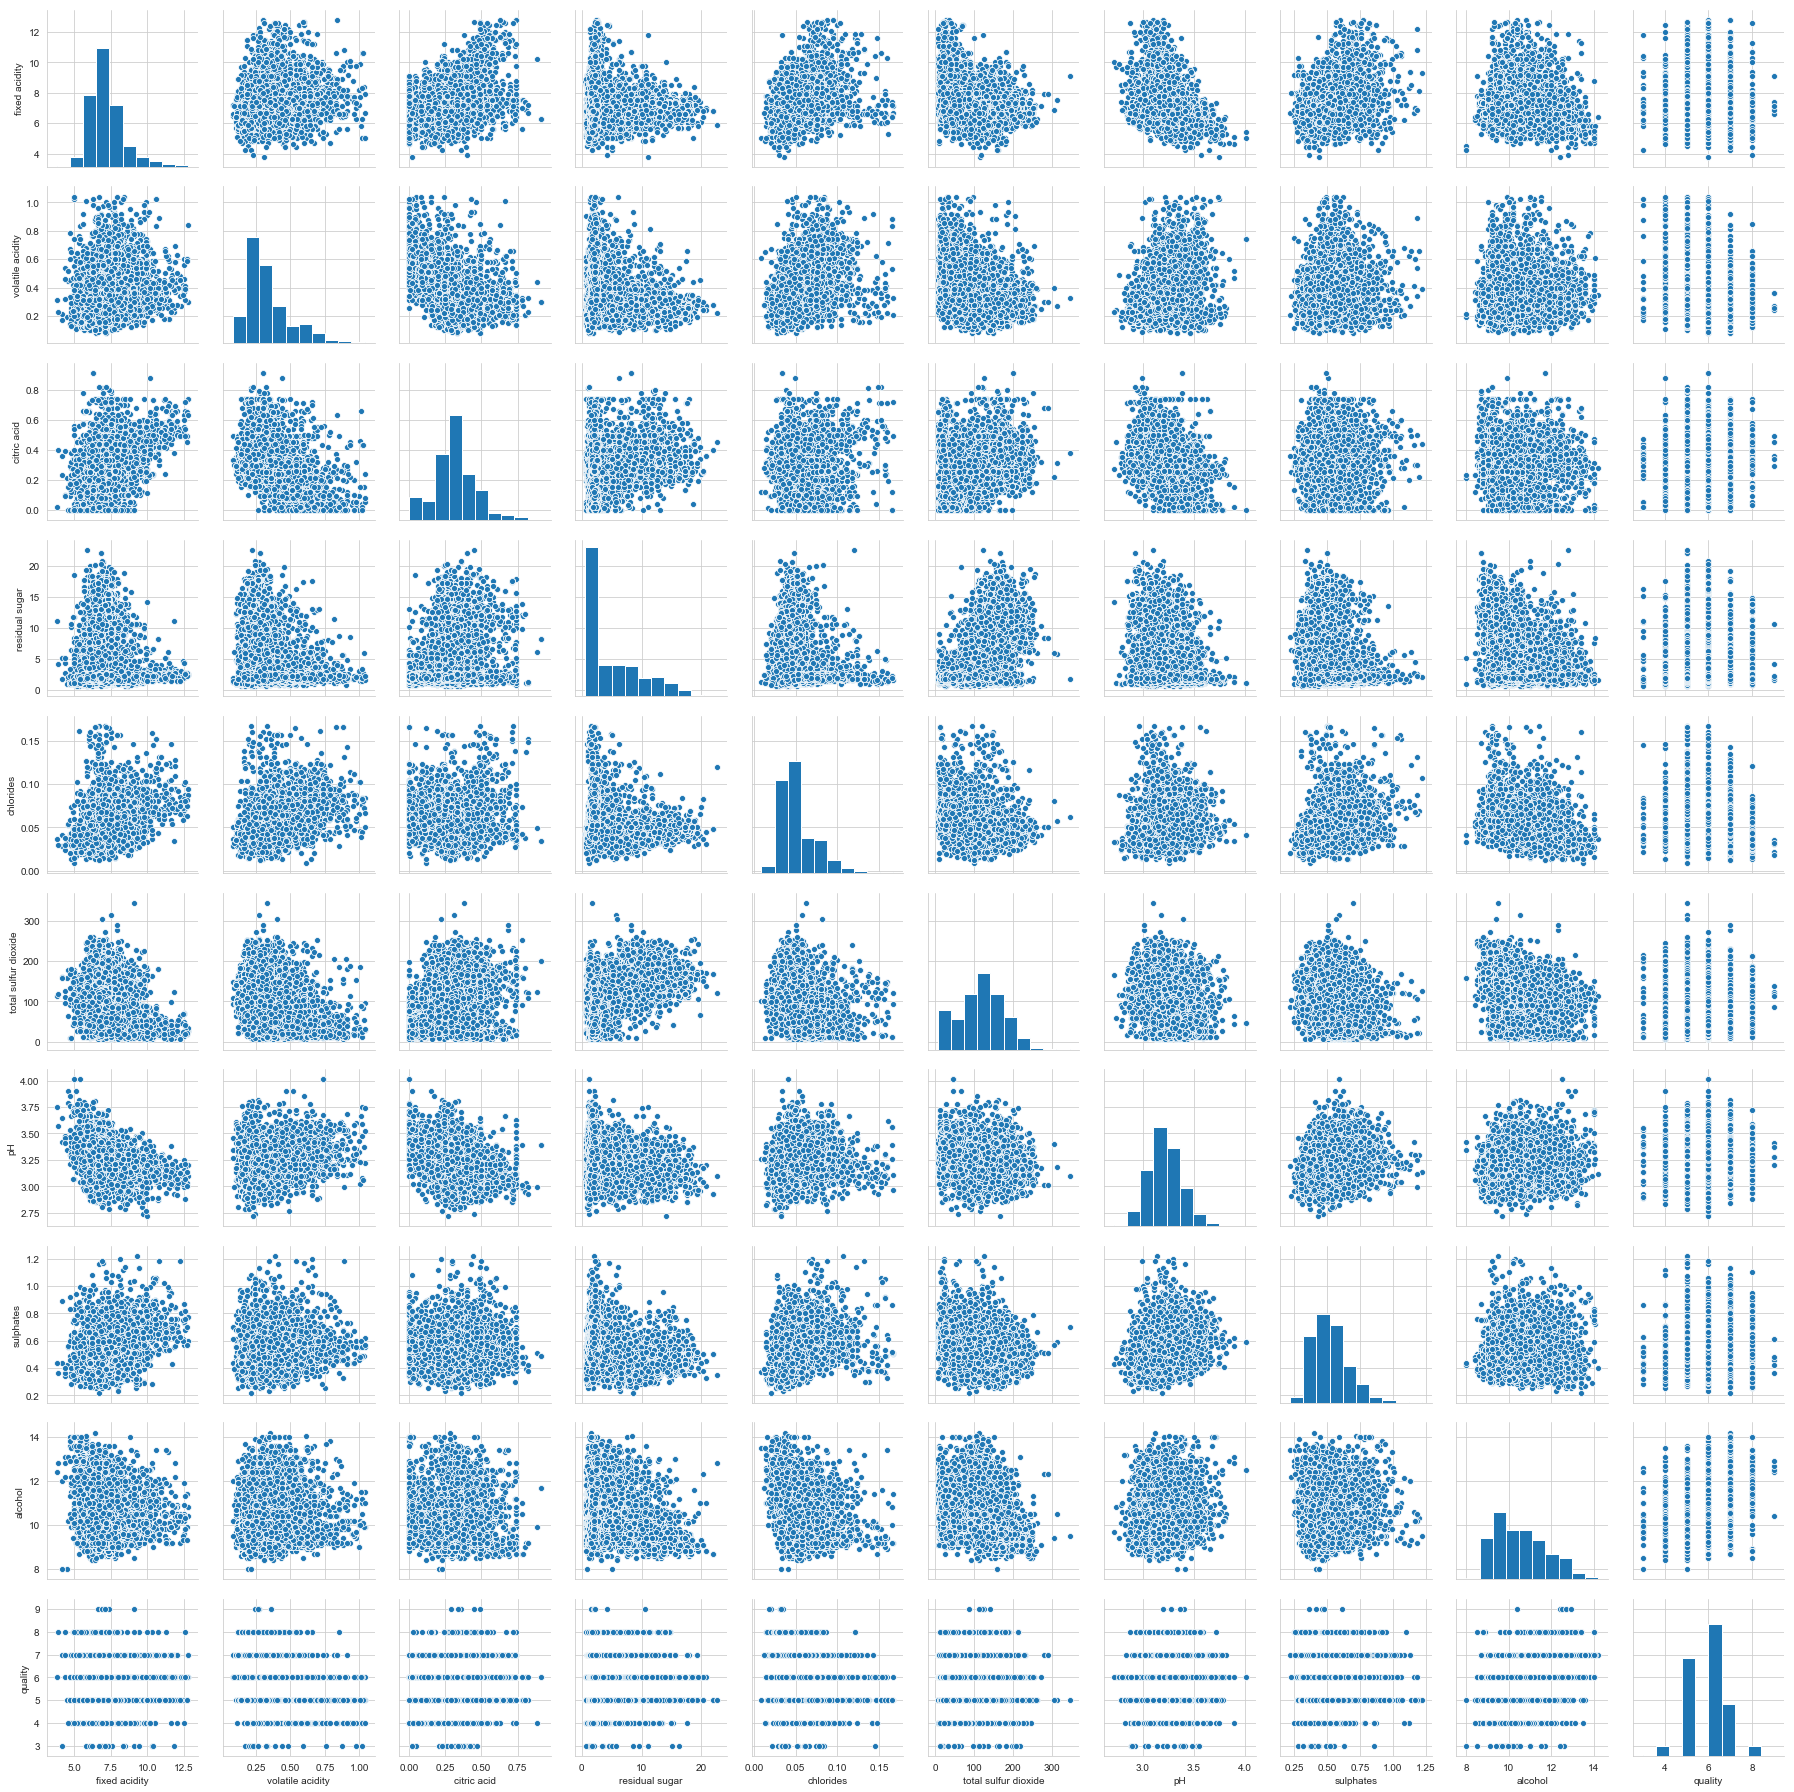

In [212]:
# Scatter plots das features contínuas

# Matriz de gráficos de dispersão (Scatterplot matrix) o oconjunto X_test
sns.pairplot(dados12,diag_kind='hist')
plt.show()

In [213]:
# Separação da variável resposta das demais features
y=dados13['quality']
X = dados13.drop('quality', axis = 1)

In [214]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: quality, dtype: int64

In [215]:
X.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  White            4.2             0.215         0.23             5.1   
1  White            6.8             0.260         0.34            15.1   
2  White            8.5             0.260         0.21            16.2   
3  White            7.1             0.320         0.32            11.0   
4  White            7.1             0.320         0.32            11.0   

   chlorides  total sulfur dioxide    pH  sulphates  alcohol  
0      0.041                 157.0  3.42       0.44      8.0  
1      0.060                 162.0  3.24       0.52     10.5  
2      0.074                 197.0  3.02       0.50      9.8  
3      0.038                  66.0  3.24       0.40     11.5  
4      0.038                  66.0  3.24       0.40     11.5

In [216]:
# COmo a única feature categórica da dataset é type e essa feature só pssui duas categorias, white e red, 
# podemos codifica-la simplesmente com LabelEncoder(); outros métodos de pré-processamento 
# como o get_dummies ou o OneHotEncoder()
#conduziriam À
# inclusão de duas colunas perfeitamente multicolineares 

# o que traria problemas para o algorítmo a ser usado: SVM
# A solução para se corrigir esse problema seria a eliminação de uma das colunas criadas pelo método,
# o que conduziria ao mesmo resultado obtido com o LabelEncoder().
# Utlizarei então o LabelEncoder() para codificar as categorias dessa feature.


In [217]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['type'] = le.fit_transform(dados13['type'])
X['type'].head()

0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int32

In [218]:
X.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            4.2             0.215         0.23             5.1   
1     1            6.8             0.260         0.34            15.1   
2     1            8.5             0.260         0.21            16.2   
3     1            7.1             0.320         0.32            11.0   
4     1            7.1             0.320         0.32            11.0   

   chlorides  total sulfur dioxide    pH  sulphates  alcohol  
0      0.041                 157.0  3.42       0.44      8.0  
1      0.060                 162.0  3.24       0.52     10.5  
2      0.074                 197.0  3.02       0.50      9.8  
3      0.038                  66.0  3.24       0.40     11.5  
4      0.038                  66.0  3.24       0.40     11.5

In [219]:
# Para se ilustrar o que aconteceria com o dataset se se fosse usar, por exemplo, o 
# método de préprocessamento como o get_dummies, e a obtenção de colunas perfeitamente multicolineares 
# veja por exemplo o código abaixo:

In [220]:
cat_feats = ['type']

In [221]:
X1 = pd.get_dummies(X,columns=cat_feats)

In [222]:
X1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            4.2             0.215         0.23             5.1      0.041   
1            6.8             0.260         0.34            15.1      0.060   
2            8.5             0.260         0.21            16.2      0.074   
3            7.1             0.320         0.32            11.0      0.038   
4            7.1             0.320         0.32            11.0      0.038   

   total sulfur dioxide    pH  sulphates  alcohol  type_0  type_1  
0                 157.0  3.42       0.44      8.0       0       1  
1                 162.0  3.24       0.52     10.5       0       1  
2                 197.0  3.02       0.50      9.8       0       1  
3                  66.0  3.24       0.40     11.5       0       1  
4                  66.0  3.24       0.40     11.5       0       1

In [223]:
# Vemosq ue as colunas type_0 e type_1 são perfeitamente colineares e 
# o que para modelos lineares como o SVM representa um grande problema para a sua estimação
# veja também que, como só temos duas catewgorias, ao se optar por outro método de pré-processmanto diferente
# do utilizado (LabelEncoder) para essa feature, E se optar 
# por  se elimiar uma das colunas criadas,
# (o que geralmente é feito para se eliminar multicolineariedade entre features)
# ficaríamos então com exatamente o mesmo resultado obtido com LabelEncoder().

In [224]:
X.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            4.2             0.215         0.23             5.1   
1     1            6.8             0.260         0.34            15.1   
2     1            8.5             0.260         0.21            16.2   
3     1            7.1             0.320         0.32            11.0   
4     1            7.1             0.320         0.32            11.0   

   chlorides  total sulfur dioxide    pH  sulphates  alcohol  
0      0.041                 157.0  3.42       0.44      8.0  
1      0.060                 162.0  3.24       0.52     10.5  
2      0.074                 197.0  3.02       0.50      9.8  
3      0.038                  66.0  3.24       0.40     11.5  
4      0.038                  66.0  3.24       0.40     11.5

In [225]:
X.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [226]:
X.shape

(18949, 10)

In [227]:
# Fazendo o train test split

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=0)

In [231]:
X_train.shape

(14211, 10)

In [232]:
X_test.shape

(4738, 10)

In [233]:
X_train_encoded = X_train['type']

In [234]:
X_test_encoded = X_test['type']

In [235]:
X_train_encoded1 = X_train_encoded.reset_index()
X_train_encoded2 = X_train_encoded1.drop(['index'],axis=1)

In [236]:
X_test_encoded1 = X_test_encoded.reset_index()
X_test_encoded2 = X_test_encoded1.drop(['index'],axis=1)

In [237]:
X_train_encoded2.head()

type
0     1
1     1
2     0
3     1
4     1

In [238]:
X_test_encoded2.shape

(4738, 1)

In [239]:
X_train_encoded2.shape

(14211, 1)

In [240]:
X_train_to_scale = X_train.drop('type', axis = 1)
#X = dados12.drop('quality', axis = 1)

In [241]:
X_train_to_scale.head()

fixed acidity  volatile acidity  citric acid  residual sugar  \
11437            7.4              0.18         0.29             1.4   
14635            7.3              0.21         0.29             1.6   
6377             8.8              0.60         0.29             2.2   
2119             9.4              0.24         0.29             8.5   
4026             6.9              0.75         0.13             6.3   

       chlorides  total sulfur dioxide    pH  sulphates  alcohol  
11437      0.042                 101.0  3.54       0.60     10.5  
14635      0.034                 118.0  3.30       0.50     11.0  
6377       0.098                  15.0  3.36       0.49      9.1  
2119       0.037                 208.0  2.90       0.38     11.0  
4026       0.036                  50.0  3.09       0.25     11.1

In [242]:
X_train_to_scale.shape

(14211, 9)

In [243]:
X_test_to_scale = X_test.drop('type', axis = 1)

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale  = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

In [247]:
scaled_columns_train  = scaler.fit_transform(X_train[columns_to_scale])

In [248]:
scaled_columns_train

array([[ 0.13, -0.94, -0.22, ...,  1.84,  0.7 , -0.28],
       [ 0.05, -0.78, -0.22, ...,  0.38, -0.04,  0.09],
       [ 1.23,  1.41, -0.22, ...,  0.74, -0.12, -1.33],
       ...,
       [-0.98, -0.83, -0.51, ...,  0.2 ,  0.4 ,  0.16],
       [-0.82,  0.96, -1.77, ...,  1.96,  0.92,  0.54],
       [ 2.34,  0.51,  4.15, ..., -1.51,  0.03, -0.73]])

In [249]:
X_train_scaled = pd.DataFrame(scaled_columns_train,columns=columns_to_scale)

In [250]:
X_train_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.125009         -0.943854    -0.215049       -0.844880  -0.245114   
1       0.045898         -0.775809    -0.215049       -0.797931  -0.601223   
2       1.232550          1.408783    -0.215049       -0.657084   2.247645   
3       1.707210         -0.607763    -0.215049        0.821814  -0.467682   
4      -0.270542          2.249011    -1.399428        0.305373  -0.512196   

   total sulfur dioxide        pH  sulphates   alcohol  
0             -0.216003  1.840443   0.697097 -0.284821  
1              0.104342  0.378534  -0.042886  0.088727  
2             -1.836574  0.744011  -0.116884 -1.330757  
3              1.800288 -2.057983  -0.930865  0.088727  
4             -1.177039 -0.900638  -1.892843  0.163437

In [251]:
scaled_columns_test  = scaler.fit_transform(X_test[columns_to_scale])

In [252]:
scaled_columns_test

array([[-0.1 ,  0.67, -0.18, ..., -0.72, -0.18,  0.81],
       [-0.5 , -1.11,  0.04, ..., -0.29,  1.5 ,  0.88],
       [ 0.53, -0.78,  0.57, ..., -1.15,  0.11, -0.01],
       ...,
       [ 1.01, -1.06,  0.12, ..., -0.6 , -0.33, -0.24],
       [-0.58,  0.51,  1.17, ..., -0.66, -1.36,  1.55],
       [-0.58, -0.44, -0.93, ...,  0.07, -1.14, -1.73]])

In [253]:
X_test_scaled = pd.DataFrame(scaled_columns_test,columns=columns_to_scale)

In [254]:
X_test_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.102979          0.672996    -0.180644        2.331990  -1.030701   
1      -0.500172         -1.111397     0.044768        0.252971  -0.633958   
2       0.532531         -0.776823     0.570730       -0.692037   0.424022   
3      -0.500172         -0.665299     0.044768       -0.810163  -0.281298   
4      -0.897365         -0.051914     1.096692       -0.054156  -0.810288   

   total sulfur dioxide        pH  sulphates   alcohol  
0              0.557314 -0.721740  -0.184168  0.806439  
1              0.293707 -0.293049   1.499236  0.880924  
2              0.481998 -1.150431   0.108598 -0.012904  
3             -0.760723 -0.109325  -0.842892  1.327839  
4             -0.346483  0.319366   0.840513  1.029896

In [255]:
#tudo10_train = tudo_train_encoded2.join(tudo_train_scaled)


In [256]:
X_tudo_train = X_train_scaled.join(X_train_encoded2)
X_tudo_test = X_test_scaled.join(X_test_encoded2)
#X_test_encoded2

In [257]:
X_tudo_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.125009         -0.943854    -0.215049       -0.844880  -0.245114   
1       0.045898         -0.775809    -0.215049       -0.797931  -0.601223   
2       1.232550          1.408783    -0.215049       -0.657084   2.247645   
3       1.707210         -0.607763    -0.215049        0.821814  -0.467682   
4      -0.270542          2.249011    -1.399428        0.305373  -0.512196   

   total sulfur dioxide        pH  sulphates   alcohol  type  
0             -0.216003  1.840443   0.697097 -0.284821     1  
1              0.104342  0.378534  -0.042886  0.088727     1  
2             -1.836574  0.744011  -0.116884 -1.330757     0  
3              1.800288 -2.057983  -0.930865  0.088727     1  
4             -1.177039 -0.900638  -1.892843  0.163437     1

In [258]:
X_tudo_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.102979          0.672996    -0.180644        2.331990  -1.030701   
1      -0.500172         -1.111397     0.044768        0.252971  -0.633958   
2       0.532531         -0.776823     0.570730       -0.692037   0.424022   
3      -0.500172         -0.665299     0.044768       -0.810163  -0.281298   
4      -0.897365         -0.051914     1.096692       -0.054156  -0.810288   

   total sulfur dioxide        pH  sulphates   alcohol  type  
0              0.557314 -0.721740  -0.184168  0.806439     1  
1              0.293707 -0.293049   1.499236  0.880924     1  
2              0.481998 -1.150431   0.108598 -0.012904     1  
3             -0.760723 -0.109325  -0.842892  1.327839     1  
4             -0.346483  0.319366   0.840513  1.029896     1

In [ ]:
# Treinando classificador usando como CV-score a Acurácia e Kernel RBF no conjunto de treinamento
# obtido com resampling Naive

In [259]:
# Iremos espevcificar 4 folds para cross validação, uma vez que a classe monoritária possui somente 4
# observações e não podemos estabeler um número de folds maior do que o número de observações da classe moniritária

In [260]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [261]:
from sklearn.model_selection import GridSearchCV

In [262]:
grid_accuracy_score = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, scoring='accuracy', cv=4)
grid_accuracy_score.fit(X_tudo_train,y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7671541057367829, total=   4.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7746201463140123, total=   4.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.8s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7632319819819819, total=   4.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7686672302056917, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5863329583802025, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.580472706809229, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5813626126126126, total=   4.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5787545787545788, total=   3.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.43363329583802024, total=   5.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ..........

[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.40540540540540543, total=   5.8s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.42040011270780503, total=   6.8s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.9114173228346457, total=   2.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.9113674732695555, total=   2.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.9056869369369369, total=   2.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.9112426035502958, total=   2.9s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.842800899887514, total=   6.0s
[CV] C=100, gamma=0.1, kernel=rbf ...........

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.1min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [264]:
# Scores Médios de validação cruzada (acurácias médias) em cada combinação de hiperparametros
res = grid_accuracy_score.cv_results_['mean_train_score'].reshape(-1, 1)
res

array([[0.82],
       [0.59],
       [0.44],
       [0.31],
       [0.14],
       [0.96],
       [0.72],
       [0.54],
       [0.42],
       [0.31],
       [1.  ],
       [0.83],
       [0.61],
       [0.48],
       [0.42],
       [1.  ],
       [0.92],
       [0.67],
       [0.54],
       [0.46],
       [1.  ],
       [0.97],
       [0.75],
       [0.6 ],
       [0.49]])

In [265]:
# Matriz de confusão e relatório de classificação no conjunto de treinamento
grid_accuracy_score_predictions_train = grid_accuracy_score.predict(X_tudo_train_res)
print(confusion_matrix(y_train_res_final, grid_accuracy_score_predictions_train))


[[ 794   14  244  855    2    5    0]
 [   0 1151  292  417   54    0    0]
 [   0   14 1584  295   21    0    0]
 [   0    4   75 1787   44    4    0]
 [   0    1   45  290 1555   23    0]
 [   0    0   31  309  219 1355    0]
 [   0    0   57  147  254  187 1269]]


In [266]:
print(classification_report(y_train_res_final, grid_accuracy_score_predictions_train))

              precision    recall  f1-score   support

           3       1.00      0.41      0.59      1914
           4       0.97      0.60      0.74      1914
           5       0.68      0.83      0.75      1914
           6       0.44      0.93      0.59      1914
           7       0.72      0.81      0.77      1914
           8       0.86      0.71      0.78      1914
           9       1.00      0.66      0.80      1914

   micro avg       0.71      0.71      0.71     13398
   macro avg       0.81      0.71      0.72     13398
weighted avg       0.81      0.71      0.72     13398



In [267]:
# Melhor escolha de hiperparâmetros:
grid_accuracy_score.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [268]:
# Melhor estimador baseado nos scores de validação cruzada:
grid_accuracy_score.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [270]:
# Avaliação no conjunto de teste

# Matriz de confusão n oconjunto de teste
grid_accuracy_score_predictions = grid_accuracy_score.predict(X_tudo_test)
print(confusion_matrix(y_test, grid_accuracy_score_predictions))


[[665   0   0   0   0   0   0]
 [  0 656   0   0   0   0   0]
 [  0   3 572  82   7   0   0]
 [  0   6 113 500  62   5   0]
 [  0   0   7  25 650   4   0]
 [  0   0   0   0   0 692   0]
 [  0   0   0   0   0   0 689]]


In [271]:
# Relatório de classificação no conjunto de teste
print(classification_report(y_test, grid_accuracy_score_predictions))


              precision    recall  f1-score   support

           3       1.00      1.00      1.00       665
           4       0.99      1.00      0.99       656
           5       0.83      0.86      0.84       664
           6       0.82      0.73      0.77       686
           7       0.90      0.95      0.93       686
           8       0.99      1.00      0.99       692
           9       1.00      1.00      1.00       689

   micro avg       0.93      0.93      0.93      4738
   macro avg       0.93      0.93      0.93      4738
weighted avg       0.93      0.93      0.93      4738



In [272]:
# Acurácia média do modelo no conjunto de teste
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, grid_accuracy_score_predictions))


0.9337273111017307
